In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv("spotify_songs.csv")

In [52]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [54]:
#rimuovo feature non importanti
df = df.drop(["playlist_name", "playlist_subgenre", "playlist_id", "track_id", "track_name", "track_artist", "track_popularity", "track_album_id", "track_album_name", "track_album_release_date", "duration_ms"], axis=1)

df.rename(columns={"playlist_genre": "genre"}, inplace=True)

In [55]:
df["genre"].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             32833 non-null  object 
 1   danceability      32833 non-null  float64
 2   energy            32833 non-null  float64
 3   key               32833 non-null  int64  
 4   loudness          32833 non-null  float64
 5   mode              32833 non-null  int64  
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 3.0+ MB


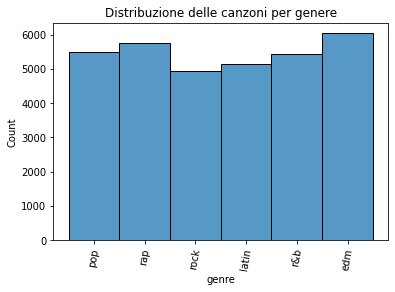

In [57]:
#distribuzione delle canzoni per genere
ax = sns.histplot(df["genre"])
_ = plt.xticks(rotation=80)
_ = plt.title("Distribuzione delle canzoni per genere")

<Axes: >

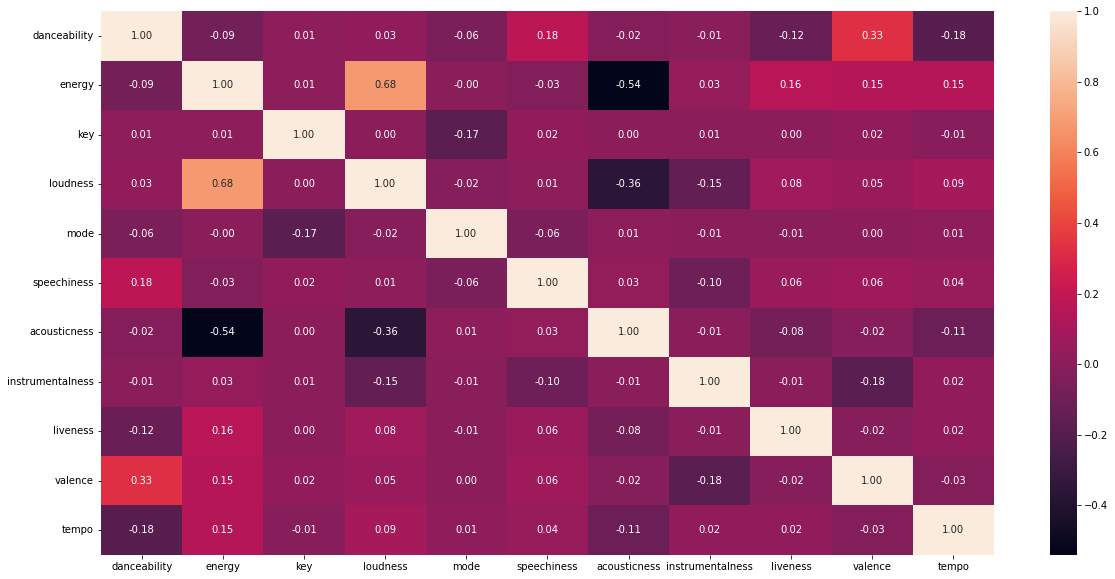

In [58]:
# matrice di correlazione
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

IndexError: index 10 is out of bounds for axis 0 with size 10

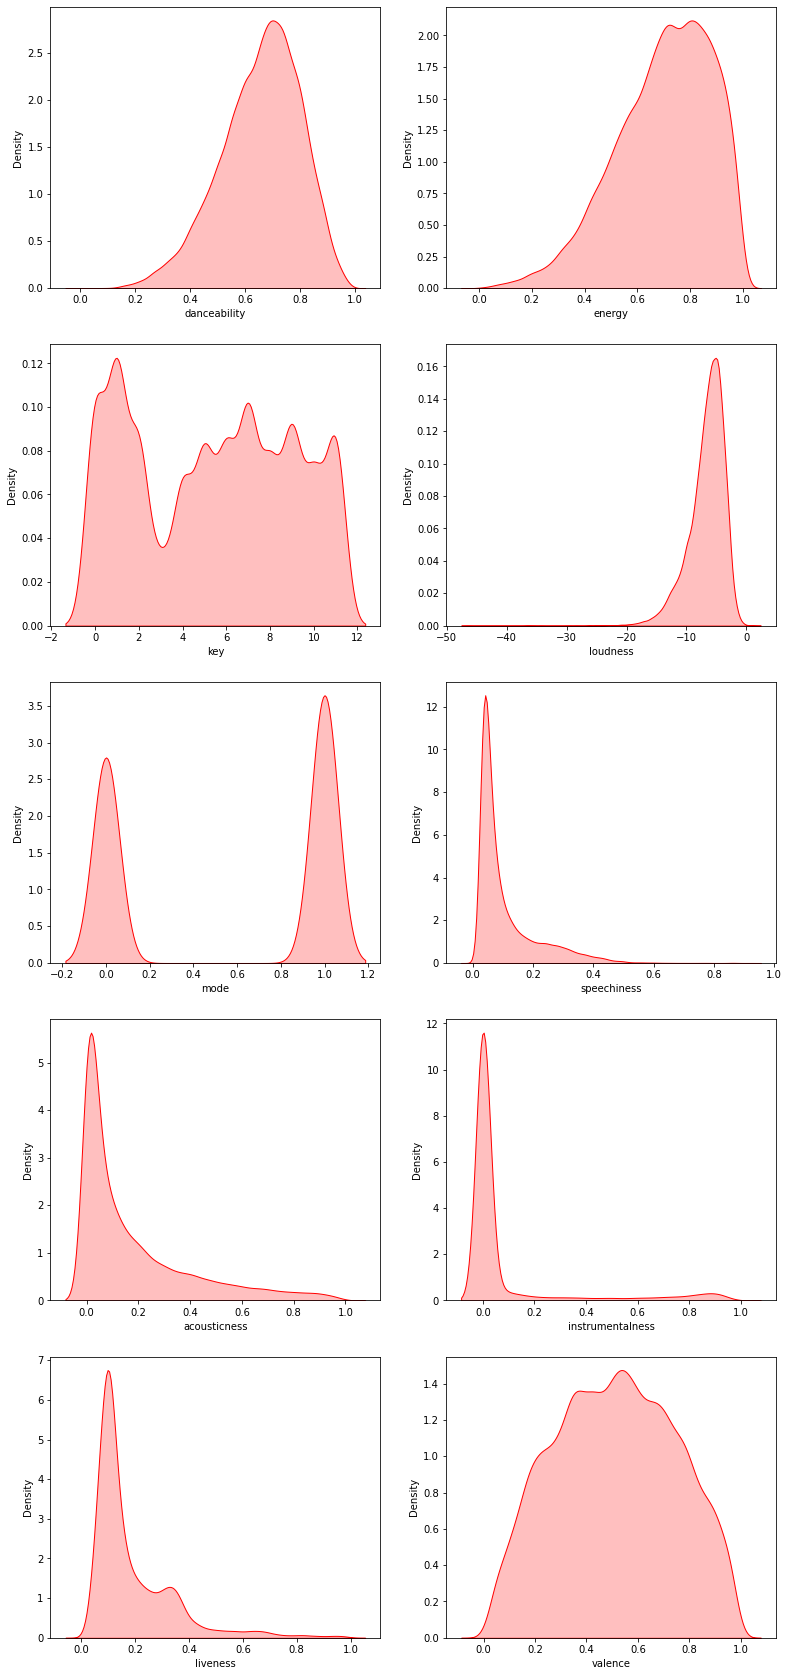

In [59]:
#distribuzione delle feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(13, 30))
axs = np.ravel(axs)

for i, col in enumerate(df.drop("genre", axis=1).columns):
    plt.sca(axs[i])
    sns.kdeplot(data=df[col], fill=True, color='red')

plt.tight_layout()

plt.show()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("genre", axis=1), df["genre"], test_size=0.2, random_state=42)

In [29]:
x_train.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000
mean,0.655268,0.697765,5.379502,-6.724544,0.106982,0.176537,0.083920,0.189447,0.511242,120.897192
std,0.144896,0.181047,3.615296,2.975759,0.101404,0.220775,0.223196,0.153709,0.232726,26.913378
min,0.077100,0.000175,0.000000,-46.448000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000
25%,0.563000,0.579000,2.000000,-8.170000,0.040800,0.015400,0.000000,0.092700,0.332000,99.946000
50%,0.671000,0.720000,6.000000,-6.174000,0.062200,0.080800,0.000016,0.127000,0.513000,121.982000
75%,0.761000,0.839000,9.000000,-4.658500,0.132000,0.256000,0.004740,0.246000,0.694000,133.971000
max,0.981000,1.000000,11.000000,1.275000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000


In [30]:
cols = x_train.columns
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [31]:
x_train.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000
mean,0.639637,0.697712,0.489046,0.832376,0.094442,0.177601,0.084426,0.182526,0.515881,0.418802
std,0.160301,0.181079,0.328663,0.062355,0.113224,0.222108,0.224543,0.155790,0.234842,0.131952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.537559,0.578926,0.181818,0.802087,0.020545,0.015492,0.000000,0.084468,0.335008,0.316082
50%,0.657042,0.719951,0.545455,0.843912,0.044439,0.081286,0.000016,0.119233,0.517654,0.424121
75%,0.756610,0.838972,0.818182,0.875668,0.122376,0.257544,0.004769,0.239844,0.700300,0.482901
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6806380386782397
